In [49]:
import pandas as pd
training_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
training_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [51]:
training_set.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
#gender
# the survival ratio in women is much higher than men
training_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [53]:
#embarkation
#passengers who were embarked from Cherbough(C) have a higher survival ratio
training_set[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [54]:
#Class of passengers
#the majority of passengers from the upper class did survive.passengers in 3rd class didnt survive,while nearly half of second class survived.
training_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


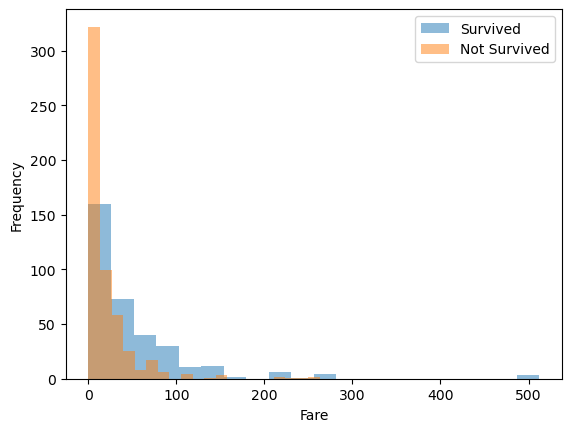

In [55]:
#Ticket fare
# avg fare value for passengers who survived is much higher. This is expected,because there shud be a correlation between fare andpclass

import matplotlib.pyplot as plt

survived = training_set[training_set['Survived'] == 1]
not_survived = training_set[training_set['Survived'] == 0]

bins = 20


plt.hist(survived['Fare'], bins=bins, alpha=0.5, label='Survived')
plt.hist(not_survived['Fare'], bins=bins, alpha=0.5, label='Not Survived')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()


plt.show()
 





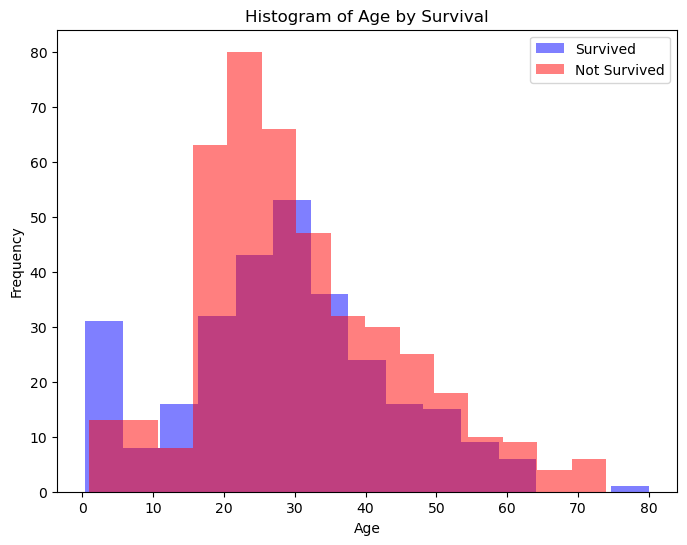

In [56]:
#Age
# children have a higher survival rate(when age<10) but middle ages have survived more than younger ages
import matplotlib.pyplot as plt


survived = training_set[training_set['Survived'] == 1]
not_survived = training_set[training_set['Survived'] == 0]


bins = 15

plt.figure(figsize=(8, 6)) 
plt.hist(survived['Age'].dropna(), bins=bins, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived['Age'].dropna(), bins=bins, alpha=0.5, label='Not Survived', color='red')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Survival')
plt.legend()

plt.show()


In [57]:
#sibSp
training_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


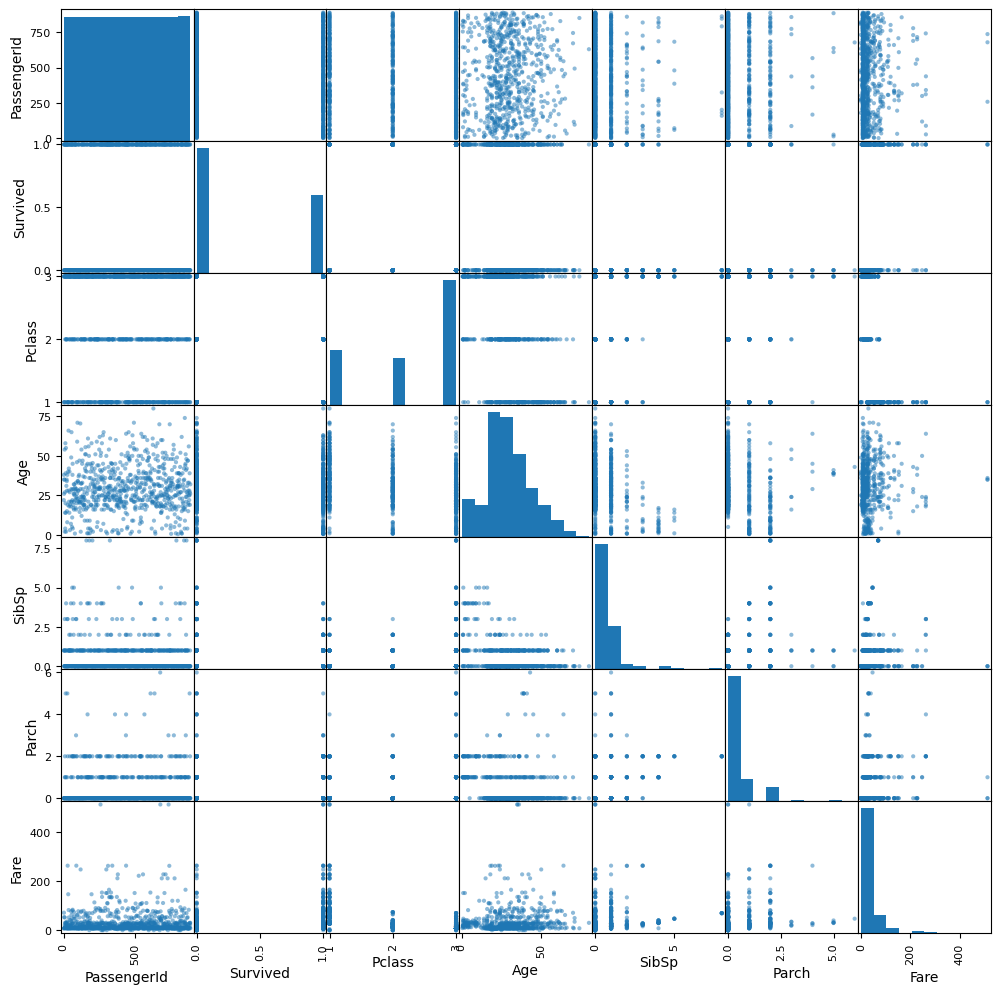

In [58]:
import pandas as pd
pd.plotting.scatter_matrix(training_set, figsize=(12,12));

Survived
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

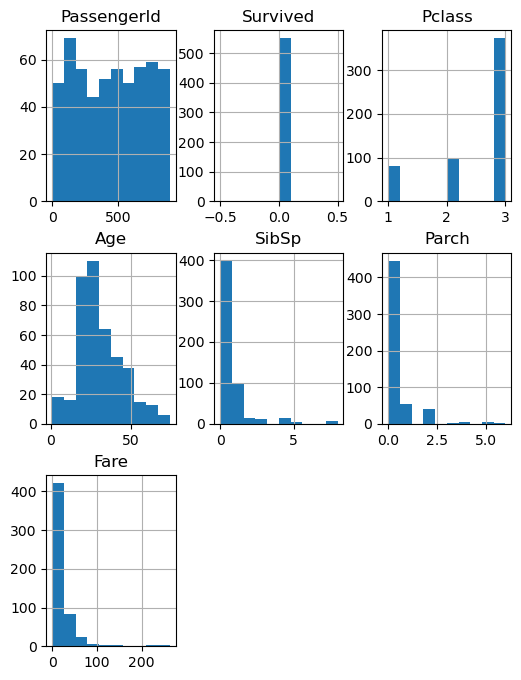

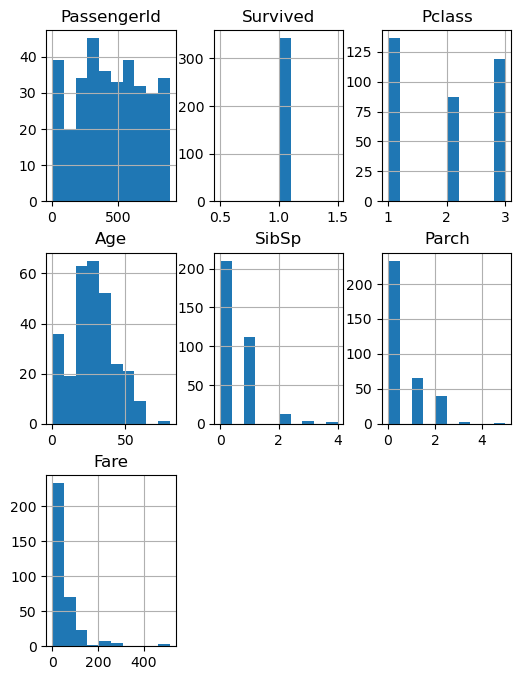

In [59]:
training_set.groupby(training_set["Survived"]).hist(figsize=(6,8))

In [60]:
training_set[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [61]:

#missing values have been filled up with the mean value
training_set["Age"].fillna(training_set["Age"].mean(),inplace=True)
test_set["Age"].fillna(test_set["Age"].mean(),inplace=True)
test_set["Fare"].fillna(test_set["Fare"].mean(),inplace=True)
X=training_set[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
Y=training_set["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, Y_train)
print("test accuracy: ",rfc.score(X_test,Y_test))
#the low accuracy is because we have used only numerical features





test accuracy:  0.6604477611940298


In [62]:
#labelencoder is used to convert categorical to numerical format
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
test_set['Sex']=l.fit_transform(test_set['Sex'])
test_set['Embarked']=l.fit_transform(test_set['Embarked'])
training_set['Sex']=l.fit_transform(training_set['Sex'])
training_set['Embarked']=l.fit_transform(training_set['Embarked'])
training_set['Cabin_code'] =training_set["Cabin"].str.slice(0,1)
test_set['Cabin_code'] = test_set["Cabin"].str.slice(0,1)
training_set['Cabin_code']=l.fit_transform(training_set['Cabin_code'])
test_set['Cabin_code']=l.fit_transform(test_set['Cabin_code'])


In [63]:
X=training_set[["Pclass","Age","SibSp","Parch","Fare","Sex","Embarked","Cabin_code"]]
Y=training_set["Survived"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)


rfc.fit(X_train,Y_train)
print("test accuracy: ",rfc.score(X_test,Y_test))

test accuracy:  0.7910447761194029


In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.fit_transform(X_test)

rfc.fit(X_train_scaler,Y_train)
print("train accuracy: ",rfc.score(X_train_scaler, Y_train))
print("test accuracy: ",rfc.score(X_test_scaler,Y_test))
# it is overfitting,so lets check the performance for each feature,to decide the cause of overfitting



train accuracy:  0.9903691813804173
test accuracy:  0.7985074626865671


In [65]:

for p in X_train.columns:
    
    rfc.fit(X_train[[p]], Y_train)
    print(p,"train accuracy: ",rfc.score(X_train[[p]], Y_train)*100)
    print(p,"test accuracy: ",rfc.score(X_test[[p]],Y_test)*100)

Pclass train accuracy:  68.0577849117175
Pclass test accuracy:  67.53731343283582
Age train accuracy:  68.86035313001605
Age test accuracy:  54.850746268656714
SibSp train accuracy:  64.36597110754414
SibSp test accuracy:  60.07462686567165
Parch train accuracy:  63.7239165329053
Parch test accuracy:  61.56716417910447
Fare train accuracy:  82.02247191011236
Fare test accuracy:  66.04477611940298
Sex train accuracy:  78.49117174959872
Sex test accuracy:  79.1044776119403
Embarked train accuracy:  62.2792937399679
Embarked test accuracy:  67.53731343283582
Cabin_code train accuracy:  70.9470304975923
Cabin_code test accuracy:  66.04477611940298


In [66]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()

grid_search.fit(X_train, Y_train)

end_time = time.time()

total_time = end_time - start_time
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_


print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Total Time Taken (seconds):", total_time)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8427870967741935
Total Time Taken (seconds): 42.54437255859375


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

import time
import numpy as np


n_iter = 100  
randomized_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, 
                                       n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()
randomized_search.fit(X_train, Y_train)

end_time = time.time()
total_time = end_time - start_time
best_params = randomized_search.best_params_
best_accuracy = randomized_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Total Time Taken (seconds):", total_time)


Conclusion : 

While both grid and randomized search are good, the cost of grid search is higher, grid search takes much more time than random search. Hence randomized search should be preferred and we get an accuracy of 84.43% for the dataset used.